In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [4]:
data = pd.read_csv(r'Streamflow Data/WaterLab.csv', comment = '#')

In [6]:
data = data[['DateTimeUTC','Discharge_cms']]

In [33]:
folder_path = 'Streamflow Data'
data_frames = []

for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_csv(file_path, comment='#')
        df = df[['DateTimeUTC', 'Discharge_cms']]
        df['DateTimeUTC'] = pd.to_datetime(df['DateTimeUTC'], errors='coerce')
        df['Site'] = file_name.replace('.csv', '')
        data_frames.append(df)

merged_data = pd.concat(data_frames, ignore_index=True)
print("Merged Data:")
print(merged_data.head())
merged_data.to_csv('merged_streamflow_data.csv', index=False)

Merged Data:
          DateTimeUTC  Discharge_cms           Site
0 2018-06-18 19:00:00        -9999.0  AboveWoodCamp
1 2018-06-18 19:15:00        -9999.0  AboveWoodCamp
2 2018-06-18 19:30:00        -9999.0  AboveWoodCamp
3 2018-06-18 19:45:00        -9999.0  AboveWoodCamp
4 2018-06-18 20:00:00        -9999.0  AboveWoodCamp


In [34]:
merged_data = merged_data[merged_data.Discharge_cms >= 0]

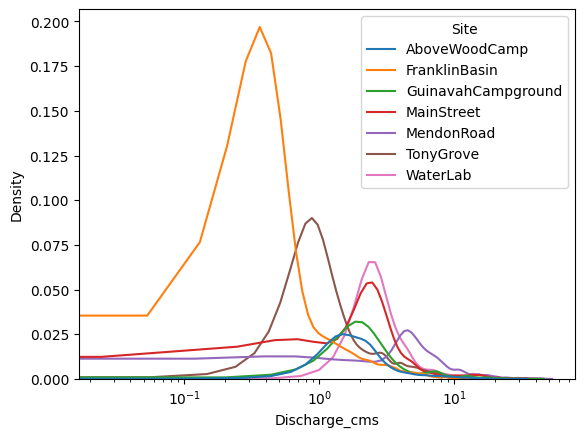

In [13]:
sns.kdeplot(data = merged_data, x = 'Discharge_cms', hue ='Site',)
plt.xscale('log')

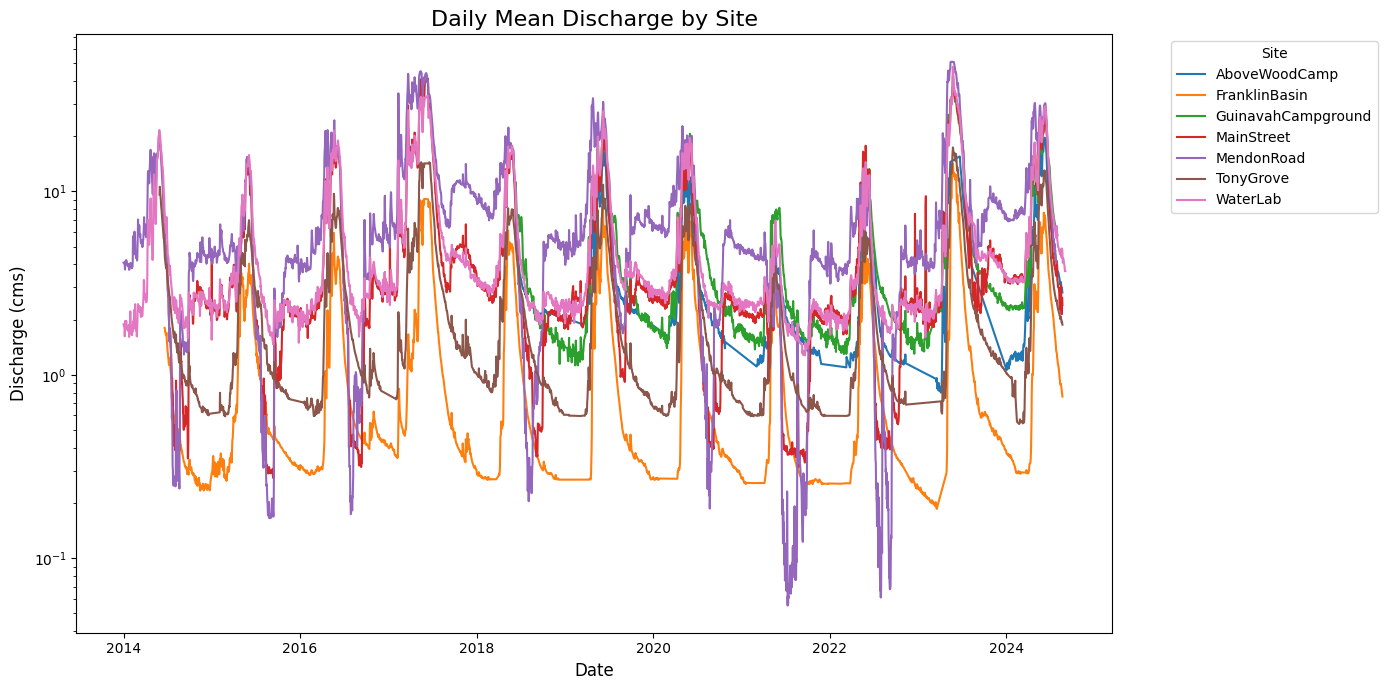

In [35]:
merged_data['Day'] = merged_data['DateTimeUTC'].dt.to_period('D')

# Calculate monthly mean
daily_mean = merged_data.groupby(['Site', 'Day'])['Discharge_cms'].mean().reset_index()

# Convert 'Month' back to datetime for plotting
daily_mean['Day'] = daily_mean['Day'].dt.to_timestamp()

# Plotting with matplotlib
plt.figure(figsize=(14, 7))

for site_name in daily_mean['Site'].unique():
    site_data = daily_mean[daily['Site'] == site_name]
    plt.plot(site_data['Day'], site_data['Discharge_cms'], label=site_name, linestyle='-',)

plt.title('Daily Mean Discharge by Site', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Discharge (cms)', fontsize=12)
plt.yscale('log')
plt.legend(title='Site', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [43]:
data = pd.read_csv(r'P and T/WaterLab.csv', comment = '#')

In [47]:
data.columns = ['Day', 'P','T']

In [48]:
data

,Day,P,T
0,2014-01-01,0.0000,-4.5676
1,2014-01-02,0.0265,-3.5508
2,2014-01-03,0.1697,-3.2976
3,2014-01-04,0.1929,-9.1943
4,2014-01-05,0.0000,-12.3087
...,...,...,...
3977,2024-11-21,0.1319,1.0117
3978,2024-11-22,0.6418,3.3977
3979,2024-11-23,5.4677,1.3388
3980,2024-11-24,2.1945,-6.3663


In [49]:
folder_path = 'P and T'
data_frames = []

for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_csv(file_path, comment='#')
        df.columns = ['Day', 'P','T']
        df['Day'] = pd.to_datetime(df['Day'], errors='coerce')
        df['Site'] = file_name.replace('.csv', '')
        data_frames.append(df)

merged_dataPandT = pd.concat(data_frames, ignore_index=True)
print("Merged Data:")
print(merged_dataPandT.head())
merged_dataPandT.to_csv('merged_PandT_data.csv', index=False)

Merged Data:
         Day       P        T           Site
0 2014-01-01  0.0000  -5.0641  AboveWoodCamp
1 2014-01-02  0.0364  -3.7481  AboveWoodCamp
2 2014-01-03  0.2337  -3.6910  AboveWoodCamp
3 2014-01-04  0.2636  -9.6799  AboveWoodCamp
4 2014-01-05  0.0000 -12.8392  AboveWoodCamp


In [52]:
merged_dataPandT.head(2)

,Day,P,T,Site
0,2014-01-01,0.0000,-5.0641,AboveWoodCamp
1,2014-01-02,0.0364,-3.7481,AboveWoodCamp


In [54]:
merged_data = pd.merge(merged_dataPandT, daily_mean, on=['Day', 'Site'], how='inner')

In [56]:
merged_data.describe()

,Day,P,T,Discharge_cms
count,21070,20859.000000,21070.000000,21070.000000
mean,2019-09-25 07:57:35.111533056,2.567599,5.604064,4.592635
min,2014-01-01 00:00:00,0.000000,-19.692400,0.055181
25%,2017-04-10 00:00:00,0.000000,-1.544800,1.343067
50%,2019-11-12 00:00:00,0.000200,5.367400,2.553464
75%,2022-04-08 00:00:00,1.949300,13.487550,5.073281
max,2024-09-01 00:00:00,59.180400,23.608400,51.120554
std,NaN,5.842051,8.925459,5.939978


In [57]:
merged_data.to_csv('final_data.csv')

In [60]:
merged_data = merged_data.dropna()

In [62]:
merged_data.Site.value_counts()

Site
WaterLab              3869
MendonRoad            3824
MainStreet            3695
TonyGrove             3022
FranklinBasin         2909
GuinavahCampground    2142
AboveWoodCamp         1398
Name: count, dtype: int64

In [63]:
Area = {'FranklinBasin':66.48,'TonyGrove':276.76, 'AboveWoodCamp':402.836, 'GuinavahCampground':519.242, 'WaterLab':519.242, 'MainStreet':559.86, 
       'MendonRoad':564.682}

In [66]:
merged_data['Area'] = merged_data['Site'].apply(lambda x: Area[x])

C:\Users\sajan\AppData\Local\Temp\ipykernel_11456\3888194760.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['Area'] = merged_data['Site'].apply(lambda x: Area[x])


In [67]:
merged_data

,Day,P,T,Site,Discharge_cms,Area
0,2018-06-18,0.0067,9.3245,AboveWoodCamp,4.860850,402.836
1,2018-06-19,0.1799,9.8528,AboveWoodCamp,4.687956,402.836
2,2018-06-20,0.0000,11.3796,AboveWoodCamp,4.527820,402.836
3,2018-06-21,0.0000,14.6775,AboveWoodCamp,4.296201,402.836
4,2018-06-22,0.0000,12.2427,AboveWoodCamp,4.160555,402.836
...,...,...,...,...,...,...
21065,2024-08-28,0.1577,12.6882,WaterLab,3.936824,519.242
21066,2024-08-29,0.0000,11.3682,WaterLab,3.882561,519.242
21067,2024-08-30,0.0000,14.8633,WaterLab,3.694140,519.242
21068,2024-08-31,0.0000,17.3361,WaterLab,3.708018,519.242


In [69]:
merged_data.to_csv('final_data.csv')

In [70]:
merged_data

,Day,P,T,Site,Discharge_cms,Area
0,2018-06-18,0.0067,9.3245,AboveWoodCamp,4.860850,402.836
1,2018-06-19,0.1799,9.8528,AboveWoodCamp,4.687956,402.836
2,2018-06-20,0.0000,11.3796,AboveWoodCamp,4.527820,402.836
3,2018-06-21,0.0000,14.6775,AboveWoodCamp,4.296201,402.836
4,2018-06-22,0.0000,12.2427,AboveWoodCamp,4.160555,402.836
...,...,...,...,...,...,...
21065,2024-08-28,0.1577,12.6882,WaterLab,3.936824,519.242
21066,2024-08-29,0.0000,11.3682,WaterLab,3.882561,519.242
21067,2024-08-30,0.0000,14.8633,WaterLab,3.694140,519.242
21068,2024-08-31,0.0000,17.3361,WaterLab,3.708018,519.242


In [75]:
merged_data['Month'] = merged_data.Day.apply(lambda x: x.month)

C:\Users\sajan\AppData\Local\Temp\ipykernel_11456\2167300479.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['Month'] = merged_data.Day.apply(lambda x: x.month)


In [78]:
merged_data['Year'] = merged_data['Day'].apply(lambda x: x.year)

C:\Users\sajan\AppData\Local\Temp\ipykernel_11456\1422847725.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['Year'] = merged_data['Day'].apply(lambda x: x.year)


In [80]:
merged_data.to_csv('final_data.csv')

In [85]:
merged_data.drop('Day',axis=1).drop_duplicates()

,P,T,Site,Discharge_cms,Area,Month,Year
0,0.0067,9.3245,AboveWoodCamp,4.860850,402.836,6,2018
1,0.1799,9.8528,AboveWoodCamp,4.687956,402.836,6,2018
2,0.0000,11.3796,AboveWoodCamp,4.527820,402.836,6,2018
3,0.0000,14.6775,AboveWoodCamp,4.296201,402.836,6,2018
4,0.0000,12.2427,AboveWoodCamp,4.160555,402.836,6,2018
...,...,...,...,...,...,...,...
21065,0.1577,12.6882,WaterLab,3.936824,519.242,8,2024
21066,0.0000,11.3682,WaterLab,3.882561,519.242,8,2024
21067,0.0000,14.8633,WaterLab,3.694140,519.242,8,2024
21068,0.0000,17.3361,WaterLab,3.708018,519.242,8,2024


In [87]:
merged_data

,Day,P,T,Site,Discharge_cms,Area,Month,Year
0,2018-06-18,0.0067,9.3245,AboveWoodCamp,4.860850,402.836,6,2018
1,2018-06-19,0.1799,9.8528,AboveWoodCamp,4.687956,402.836,6,2018
2,2018-06-20,0.0000,11.3796,AboveWoodCamp,4.527820,402.836,6,2018
3,2018-06-21,0.0000,14.6775,AboveWoodCamp,4.296201,402.836,6,2018
4,2018-06-22,0.0000,12.2427,AboveWoodCamp,4.160555,402.836,6,2018
...,...,...,...,...,...,...,...,...
21065,2024-08-28,0.1577,12.6882,WaterLab,3.936824,519.242,8,2024
21066,2024-08-29,0.0000,11.3682,WaterLab,3.882561,519.242,8,2024
21067,2024-08-30,0.0000,14.8633,WaterLab,3.694140,519.242,8,2024
21068,2024-08-31,0.0000,17.3361,WaterLab,3.708018,519.242,8,2024


In [89]:
merged_data

,Day,P,T,Site,Discharge_cms,Area,Month,Year
0,2018-06-18,0.0067,9.3245,AboveWoodCamp,4.860850,402.836,6,2018
1,2018-06-19,0.1799,9.8528,AboveWoodCamp,4.687956,402.836,6,2018
2,2018-06-20,0.0000,11.3796,AboveWoodCamp,4.527820,402.836,6,2018
3,2018-06-21,0.0000,14.6775,AboveWoodCamp,4.296201,402.836,6,2018
4,2018-06-22,0.0000,12.2427,AboveWoodCamp,4.160555,402.836,6,2018
...,...,...,...,...,...,...,...,...
21065,2024-08-28,0.1577,12.6882,WaterLab,3.936824,519.242,8,2024
21066,2024-08-29,0.0000,11.3682,WaterLab,3.882561,519.242,8,2024
21067,2024-08-30,0.0000,14.8633,WaterLab,3.694140,519.242,8,2024
21068,2024-08-31,0.0000,17.3361,WaterLab,3.708018,519.242,8,2024
